# Kaggle Competition: Titanic: Machine Learning from Disaster

### A start for Caique Borges into the Kaggle and DataScience Competitions

This is my first attemp to participate in a Kaggle Competetion. I'm studying datascience and machine learning for a few months, watching courses in Udemy, Youtube, Alura, and know it's time for test and put into practise some of the things that I've learned and most important: learn even more!

### Imports 

Importing necessary (for now) packages for applying Data Science

In [114]:
import pandas as pd
import numpy as np

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the csv files and checking the dataframe

Ok, now let's import the CSV files as dataframes, and take a look at how the data is structured

In [116]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [117]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### A function to transform the dataframe

Here is what I'm thinking: what about build a function, that is going to process the dataframe imported from the csv, to the dataframe that will be used for training and testing the model?

If all the transformations remain in the same function, it's going to be easier for loading a new dataset and train/test/predict it.

In [140]:
def transform_df(df):
    #do all the crazy stuff, magic, polymerizations with df
    df.drop(['PassengerId','Name','Ticket'], 1, inplace=True)
    
    # overwriting nan values with random age values (based on mean and standard deviation)
    age_mean = df['Age'].mean()
    age_std = df['Age'].std()
    age_nan_count = df['Age'].isnull().count()
    
    rand_ages = np.random.randint(age_mean - age_std, age_mean + age_std, age_nan_count)
    df['Age'][np.isnan(df['Age'])] = rand_ages
    
    return df

Maybe that should be fine! But let's build this function little by little (during the feature analysis and transformation), and then implement it in the end of the process.

### Let's start the feature analysis

#### A general look into the data

In [119]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Checking the correlation between some variables and 'Survived'

In [121]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [122]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [123]:
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


#### Removing unnecessary columns

In [124]:
train_df.drop(['PassengerId','Name','Ticket'], 1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [125]:
test_df.drop(['PassengerId', 'Name', 'Ticket'], 1, inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


### Let's fill and transform some data

#### Starting by age

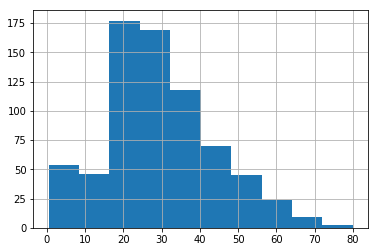

In [126]:
train_df['Age'].hist()

In [127]:
# There are 177 null values, practically 1/4 of the dataset have nan ages!
print('Count:', train_df['Age'].count())
print('Null count:', train_df['Age'].isnull().sum())
print(train_df['Age'].isnull().sum() / train_df['Age'].count() * 100,'% of ages are NAN', sep="")

Count: 714
Null count: 177
24.7899159664% of ages are NAN


In [128]:
# Let's fix that, by using mean and standart deviation together

In [129]:
age_mean = train_df['Age'].mean()
age_std = train_df['Age'].std()
age_nan_count = train_df['Age'].isnull().count()

In [130]:
age_mean, age_std, age_nan_count

(29.69911764705882, 14.526497332334042, 891)

In [132]:
rand_ages = np.random.randint(age_mean - age_std, age_mean + age_std, age_nan_count)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


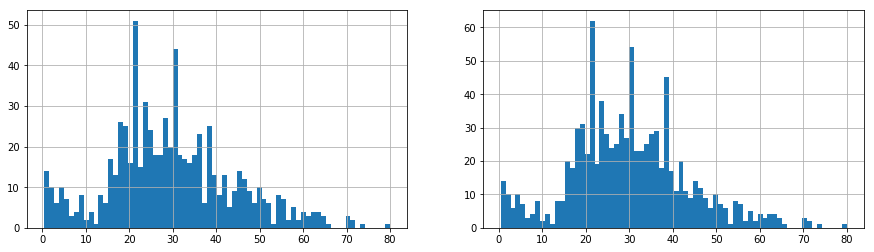

In [133]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(15,4))
axis1.set_title = 'Original values of ages'
axis2.set_title = 'New values of ages'

# Original values without NAN
train_df['Age'].dropna().astype(float).hist(bins=70, ax=axis1)

# New values with random ages
train_df['Age'][np.isnan(train_df['Age'])] = rand_ages
train_df['Age'].hist(bins=70, ax=axis2)

In [141]:
print('Now there are {} null values!'.format( train_df['Age'].isnull().sum()) )

Now there are 0 null values!
